# Pyber Assignment

* The most expensive fares tend to be within the rural areas. 
    * This is probably due to the fact  that is may be expensive to drive to deep rural areas  

* Largest percent of fares (hence riders) are usually found in the Urban areas.

* Drivers are also found in the Urban areas as that is where most of the customers are.
    * This is in contrast to rural areas which have very little drivers.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")
city_df = city_df.drop_duplicates('city',keep ="first")
merge_df = pd.merge(city_df, ride_df, on = "city", how = 'outer')




##  Bubble Plot of Ride Sharing Data

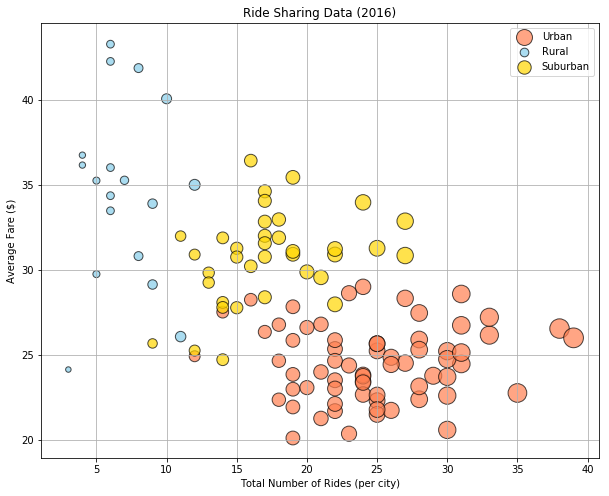

In [4]:
urban_data = merge_df.loc[merge_df["type"] == "Urban"]
suburban_data = merge_df.loc[merge_df["type"] == "Suburban"]
rural_data = merge_df.loc[merge_df["type"] == "Rural"]

average_fare_urban = urban_data.groupby(["city"])['fare'].mean()
total_urban_riders = urban_data.groupby(["city"]).count()["ride_id"]
total_urban_drivers = urban_data.groupby(["city"])['driver_count'].value_counts()

average_fare_rural = rural_data.groupby(["city"])['fare'].mean()
total_rural_riders = rural_data.groupby(["city"]).count()["ride_id"]
total_rural_drivers = rural_data.groupby(["city"])['driver_count'].value_counts()

average_fare_suburban = suburban_data.groupby(["city"])['fare'].mean()
total_suburban_riders = suburban_data.groupby(["city"]).count()["ride_id"]
total_suburban_drivers = suburban_data.groupby(["city"])['driver_count'].value_counts()

plt.figure(figsize = (10,8))

Urban = plt.plot(color="coral", linewidth=1, label="Urban")
Suburban = plt.plot(color="skyblue", linewidth=1, label="Suburban")
Rural = plt.plot(color="gold", linewidth=1, label="Rural")

plt.title("Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid()

plt.scatter(total_urban_riders, average_fare_urban,s=total_urban_riders*10,
            marker ='o', facecolors ="Coral", edgecolors='Black',alpha = 0.7, label="Urban")
plt.scatter(total_rural_riders, average_fare_rural,s=total_rural_riders*10,
            marker ='o', facecolors ="Skyblue", edgecolors='Black',alpha = 0.7, label="Rural")
plt.scatter(total_suburban_riders, average_fare_suburban,s=total_suburban_riders*10,
            marker ='o', facecolors ="Gold", edgecolors='Black',alpha = 0.7, label="Suburban")

plt.legend(loc = "best")

##  Total Fares by City Type

(-1.2228473606684713,
 1.3271029760085176,
 -1.096553713741845,
 1.1305676208307407)

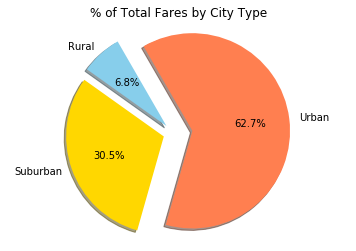

In [5]:
fare_total = merge_df.groupby(["type"])["fare"].sum()
city_type_labels = ["Rural", "Suburban", "Urban"]
color_scheme = ["Skyblue", "Gold", "Coral"]
plt.title ("% of Total Fares by City Type")
explode = [0.1, 0.1, 0.2]
plt.pie(fare_total, explode = explode, labels = city_type_labels, colors = color_scheme, autopct = "%1.1f%%", shadow = True, startangle = 120)
plt.axis("equal")


##  Total Rides by City Type

(-1.221367284153949, 1.328839846867472, -1.0885299867717595, 1.141124253691905)

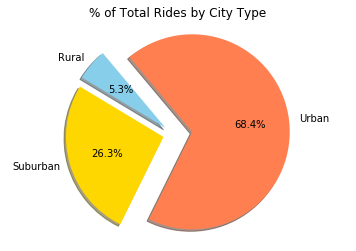

In [6]:
rides_total = merge_df.groupby(["type"])["ride_id"].count()
city_type_labels = ["Rural", "Suburban", "Urban"]
plt.title ("% of Total Rides by City Type")
explode = [0.1, 0.1, 0.2]
plt.pie(rides_total, explode = explode, labels = city_type_labels, colors = color_scheme, autopct = "%1.1f%%", shadow = True, startangle = 130)
plt.axis("equal")

##  Total Drivers by City Type

(-1.2180101813713364,
 1.2157931760988638,
 -1.099126808140599,
 1.1133722196191538)

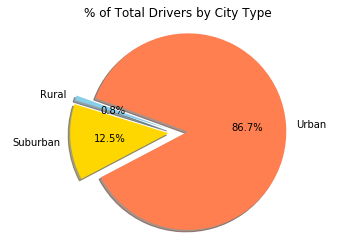

In [7]:
driver_total = merge_df.groupby(["type"])["driver_count"].sum()
city_type_labels = ["Rural", "Suburban", "Urban"]
color_scheme = ["Skyblue", "Gold", "Coral"]
plt.title ("% of Total Drivers by City Type")
explode = [0.1, 0.1, 0.1]
plt.pie(driver_total, explode = explode, labels = city_type_labels, colors = color_scheme, autopct = "%1.1f%%", shadow = True, startangle = 160)
plt.axis("equal")